<a href="https://colab.research.google.com/github/AxithChoudhary/Chatbot-coincent/blob/main/CoinCent_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ChatBot

In [39]:
import pickle
import os
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
with open("/content/drive/MyDrive/Dataset/Coincent NLP /dataset/train_qa.txt","rb") as fp:
    train_data=pickle.load(fp)
print(train_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
with open("/content/drive/MyDrive/Dataset/Coincent NLP /dataset/test_qa.txt","rb") as fp:
    test_data=pickle.load(fp)
print(test_data)

[(['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no'), (['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.'], ['Is', 'John', 'in', 'the', 'kitchen', '?'], 'no'), (['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.'], ['Is', 'John', 'in', 'the', 'garden', '?'], 'yes'), (['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'travelled', 'to', 

In [42]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [43]:
print(f"story: {train_data[0][0]},question: {train_data[0][1]}, answer: {train_data[0][2]}")

story: ['Mary', 'moved', 'to', 'the', 'bathroom', '.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom', '.'],question: ['Is', 'Sandra', 'in', 'the', 'hallway', '?'], answer: no


In [44]:
vocab=set()
all_data=test_data+train_data

In [45]:
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))
vocab.add("no")
vocab.add("yes")

In [46]:
vocab_size=len(vocab)+1

In [47]:
all_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [48]:
max_story_len=max([len(story[0]) for story in all_data])
print(max_story_len)

156


In [49]:
max_question_len=max([len(story[1]) for story in all_data])
print(max_question_len)

6


In [50]:
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'milk': 1,
 'hallway': 2,
 'mary': 3,
 'moved': 4,
 'down': 5,
 'apple': 6,
 'went': 7,
 'got': 8,
 'travelled': 9,
 'grabbed': 10,
 'daniel': 11,
 'took': 12,
 'discarded': 13,
 'in': 14,
 'office': 15,
 'yes': 16,
 'to': 17,
 'kitchen': 18,
 'picked': 19,
 'dropped': 20,
 'the': 21,
 'there': 22,
 'left': 23,
 'bathroom': 24,
 'put': 25,
 'no': 26,
 'bedroom': 27,
 'back': 28,
 'sandra': 29,
 'football': 30,
 'john': 31,
 'journeyed': 32,
 'is': 33,
 '?': 34,
 '.': 35,
 'garden': 36,
 'up': 37}

In [51]:
train_story_text=[]
train_question_text=[]
train_answer=[]

for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)

In [52]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [53]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)
len(train_story_seq)

10000

In [54]:
train_story_seq

[[3, 4, 17, 21, 24, 35, 29, 32, 17, 21, 27, 35],
 [3,
  4,
  17,
  21,
  24,
  35,
  29,
  32,
  17,
  21,
  27,
  35,
  3,
  7,
  28,
  17,
  21,
  27,
  35,
  11,
  7,
  28,
  17,
  21,
  2,
  35],
 [3,
  4,
  17,
  21,
  24,
  35,
  29,
  32,
  17,
  21,
  27,
  35,
  3,
  7,
  28,
  17,
  21,
  27,
  35,
  11,
  7,
  28,
  17,
  21,
  2,
  35,
  29,
  7,
  17,
  21,
  18,
  35,
  11,
  7,
  28,
  17,
  21,
  24,
  35],
 [3,
  4,
  17,
  21,
  24,
  35,
  29,
  32,
  17,
  21,
  27,
  35,
  3,
  7,
  28,
  17,
  21,
  27,
  35,
  11,
  7,
  28,
  17,
  21,
  2,
  35,
  29,
  7,
  17,
  21,
  18,
  35,
  11,
  7,
  28,
  17,
  21,
  24,
  35,
  11,
  19,
  37,
  21,
  30,
  22,
  35,
  11,
  7,
  17,
  21,
  27,
  35],
 [3,
  4,
  17,
  21,
  24,
  35,
  29,
  32,
  17,
  21,
  27,
  35,
  3,
  7,
  28,
  17,
  21,
  27,
  35,
  11,
  7,
  28,
  17,
  21,
  2,
  35,
  29,
  7,
  17,
  21,
  18,
  35,
  11,
  7,
  28,
  17,
  21,
  24,
  35,
  11,
  19,
  37,
  21,
  30,
  22,
  35,
 

In [55]:
tokenizer.word_index

{'milk': 1,
 'hallway': 2,
 'mary': 3,
 'moved': 4,
 'down': 5,
 'apple': 6,
 'went': 7,
 'got': 8,
 'travelled': 9,
 'grabbed': 10,
 'daniel': 11,
 'took': 12,
 'discarded': 13,
 'in': 14,
 'office': 15,
 'yes': 16,
 'to': 17,
 'kitchen': 18,
 'picked': 19,
 'dropped': 20,
 'the': 21,
 'there': 22,
 'left': 23,
 'bathroom': 24,
 'put': 25,
 'no': 26,
 'bedroom': 27,
 'back': 28,
 'sandra': 29,
 'football': 30,
 'john': 31,
 'journeyed': 32,
 'is': 33,
 '?': 34,
 '.': 35,
 'garden': 36,
 'up': 37}

In [56]:
def vectorize_story(data,word_index=tokenizer.word_index
                    ,max_story_len=max_story_len
                    ,max_question_len=max_question_len):
  X=[]
  Xq=[]
  Y=[]


  #here we are assigning the number to each word in the sentence
  for story,question,answer in data:
    x=[word_index[word.lower()] for word in story]
    xq=[word_index[word.lower()] for word in question]
    y=np.zeros(len(word_index)+1)
    y[word_index[answer]]=1
    
    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return(pad_sequences(X,max_story_len),pad_sequences(Xq,max_question_len),np.array(Y))



In [57]:
input_train,queries_train,answers_train=vectorize_story(train_data)
input_test,queries_test,answer_test=vectorize_story(test_data)
answers_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [58]:
queries_train

array([[33, 29, 14, 21,  2, 34],
       [33, 11, 14, 21, 24, 34],
       [33, 11, 14, 21, 15, 34],
       ...,
       [33, 29, 14, 21,  2, 34],
       [33,  3, 14, 21, 18, 34],
       [33,  3, 14, 21, 27, 34]], dtype=int32)

In [59]:
from keras.models import Sequential,Model
from keras.layers import Embedding
from keras.layers import Input,Dense,Activation,Permute,Dropout,add,dot,concatenate,LSTM



In [60]:
input_sequence=Input((max_story_len,))
question=Input((max_question_len,))

input_encoder_m=Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation("softmax")(match)

response=add([match,input_encoded_c])
response=Permute((2,1))(response)

answer=concatenate([response,question_encoded])
answer

answer=LSTM(32)(answer)

In [61]:
# answer=Dropout(0.5)(answer)
answer=Dense(vocab_size)(answer)
answer=Activation("softmax")(answer)
model=Model([input_sequence,question],answer)
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_9 (Sequential)      (None, None, 64)     2432        ['input_7[0][0]']                
                                                                                                  
 sequential_11 (Sequential)     (None, 6, 64)        2432        ['input_8[0][0]']                
                                                                                            

In [62]:
input_train

array([[ 0,  0,  0, ..., 21, 27, 35],
       [ 0,  0,  0, ..., 21,  2, 35],
       [ 0,  0,  0, ..., 21, 24, 35],
       ...,
       [ 0,  0,  0, ..., 21, 27, 35],
       [ 0,  0,  0, ...,  1, 22, 35],
       [ 0,  0,  0, ...,  6, 22, 35]], dtype=int32)

In [64]:
history=model.fit([input_train,queries_train],
                  answers_train,
                  batch_size=32,
                  epochs=200,
                  validation_data=([input_test,queries_test],answer_test))

Epoch 1/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6916 - accuracy: 0.5190 - val_loss: 0.6879 - val_accuracy: 0.5410
Epoch 2/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6744 - accuracy: 0.5808 - val_loss: 0.6555 - val_accuracy: 0.6530
Epoch 3/200
313/313 [==============================] - 2s 7ms/step - loss: 0.6066 - accuracy: 0.7007 - val_loss: 0.5414 - val_accuracy: 0.7510
Epoch 4/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4718 - accuracy: 0.7953 - val_loss: 0.4435 - val_accuracy: 0.8080
Epoch 5/200
313/313 [==============================] - 2s 7ms/step - loss: 0.4079 - accuracy: 0.8338 - val_loss: 0.4084 - val_accuracy: 0.8250
Epoch 6/200
313/313 [==============================] - 2s 7ms/step - loss: 0.3783 - accuracy: 0.8437 - val_loss: 0.4030 - val_accuracy: 0.8250
Epoch 7/200
313/313 [==============================] - 2s 7ms/step - loss: 0.3663 - accuracy: 0.8471 - val_loss: 0.3973 - val_accuracy: 0.8260

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


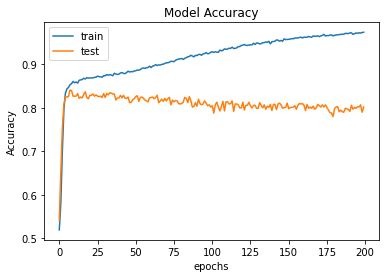

In [68]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [70]:
model.save("/content/drive/MyDrive/Dataset/Coincent NLP /chatbot_model")

In [71]:
model.load_weights("/content/drive/MyDrive/Dataset/Coincent NLP /chatbot_model")
pred_results=model.predict(([input_test,queries_test]))


32/32 [==============================] - 0s 2ms/step
